# BurnOut Lite - AI Based CPU Benchmarking Tool

## Benchmarks Dataset

In [42]:
import pandas as pd

# Loading the uploaded Cinebench R23 dataset
benchmarks = pd.read_csv('CPU_benchmark_v4.csv')

# Showing basic info
benchmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cpuName      3825 non-null   object 
 1   price        1967 non-null   float64
 2   cpuMark      3825 non-null   int64  
 3   cpuValue     1967 non-null   float64
 4   threadMark   3825 non-null   int64  
 5   threadValue  1967 non-null   float64
 6   TDP          3140 non-null   float64
 7   powerPerf    3140 non-null   object 
 8   cores        3825 non-null   int64  
 9   testDate     3825 non-null   int64  
 10  socket       3825 non-null   object 
 11  category     3825 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 358.7+ KB


In [43]:
# Description of the dataset
round(benchmarks.describe())

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,cores,testDate
count,1967.0,3825.0,1967.0,3825.0,1967.0,3140.0,3825.0,3825.0
mean,442.0,5992.0,35.0,1391.0,15.0,62.0,5.0,2015.0
std,907.0,9618.0,36.0,816.0,18.0,48.0,6.0,5.0
min,4.0,77.0,0.0,75.0,0.0,2.0,1.0,2007.0
25%,65.0,943.0,12.0,729.0,5.0,28.0,2.0,2011.0
50%,161.0,2331.0,26.0,1274.0,10.0,53.0,4.0,2015.0
75%,393.0,6643.0,46.0,1961.0,19.0,85.0,6.0,2020.0
max,8978.0,108822.0,345.0,4317.0,268.0,300.0,80.0,2022.0


In [44]:
# Top 5 rows
benchmarks.head()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop


In [45]:
# Bottom 5 rows
benchmarks.tail()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
3820,Intel Pentium 4 1.60GHz,NaN,84,NaN,225,NaN,38.0,2.22,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,NaN,83,NaN,180,NaN,54.7,1.52,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,NaN,81,NaN,223,NaN,57.8,1.41,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,NaN,80,NaN,83,NaN,5.0,16.08,1,2017,NanoBGA2,Laptop
3824,Intel Pentium 4 1300MHz,NaN,77,NaN,203,NaN,51.6,1.5,1,2009,PGA423,Desktop


In [46]:
# Dataset Columns
benchmarks.columns

Index(['cpuName', 'price', 'cpuMark', 'cpuValue', 'threadMark', 'threadValue',
       'TDP', 'powerPerf', 'cores', 'testDate', 'socket', 'category'],
      dtype='object')

## Dataset Cleaning

In [47]:
# Dropping the columns that won't be useful or are post-benchmark calculations
columns = ['price', 'cpuValue', 'threadValue']
cleanedBenchmarks = benchmarks.drop(columns = columns)

In [48]:
cleanedBenchmarks.head(3)

,cpuName,cpuMark,threadMark,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,108822,3330,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,88338,2635,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,86006,2387,NaN,NaN,64,2021,unknown,Server


In [49]:
# Checking for any duplicated row or any row without 'cpuMark'
print('Duplicated rows ', cleanedBenchmarks.duplicated().sum())
print('Rows without cpuMark ', cleanedBenchmarks.cpuMark.isnull().sum())

Duplicated rows  0
Rows without cpuMark  0


In [50]:
# Dataset shape before dropping rows with missing values
print('Rows ', cleanedBenchmarks.shape[0])
print('Columns ', cleanedBenchmarks.shape[1])

Rows  3825
Columns  9


In [51]:
# For simplicity, let's drop rows with any missing values in the remaining columns,
cleanedBenchmarks.dropna(inplace = True)

In [52]:
# Dataset shape before dropping rows with missing values
print('Rows ', cleanedBenchmarks.shape[0])
print('Columns ', cleanedBenchmarks.shape[1])

Rows  3140
Columns  9


In [53]:
# Displaying the cleaned dataset's info and a preview
cleanedBenchmarks.info(), cleanedBenchmarks.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 0 to 3824
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cpuName     3140 non-null   object 
 1   cpuMark     3140 non-null   int64  
 2   threadMark  3140 non-null   int64  
 3   TDP         3140 non-null   float64
 4   powerPerf   3140 non-null   object 
 5   cores       3140 non-null   int64  
 6   testDate    3140 non-null   int64  
 7   socket      3140 non-null   object 
 8   category    3140 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 245.3+ KB


(None,
                              cpuName  cpuMark  threadMark    TDP powerPerf  \
 0  AMD Ryzen Threadripper PRO 5995WX   108822        3330  280.0    388.65   
 1                      AMD EPYC 7763    88338        2635  280.0    315.49   
 3                      AMD EPYC 7713    85861        2727  225.0     381.6   
 4  AMD Ryzen Threadripper PRO 3995WX    83971        2626  280.0     299.9   
 5       AMD Ryzen Threadripper 3990X    81568        2569  280.0    291.31   
 
    cores  testDate socket category  
 0     64      2022  sWRX8  Desktop  
 1     64      2021    SP3   Server  
 3     64      2021    SP3   Server  
 4     64      2020  sWRX8  Desktop  
 5     64      2020  sTRX4  Desktop  )

## DataFrame Visualization

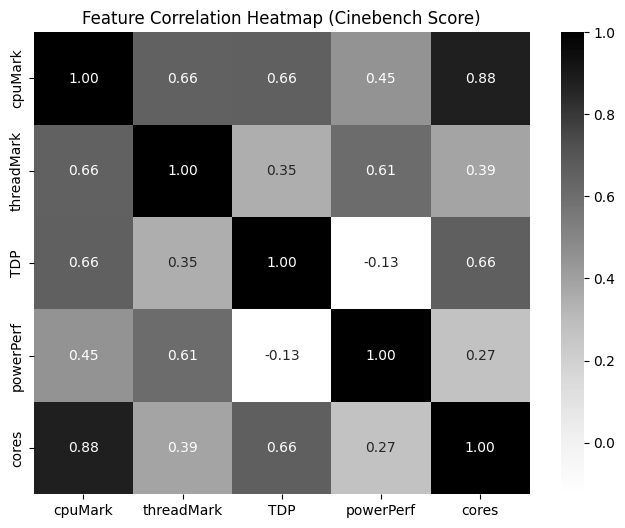

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = cleanedBenchmarks[['cpuMark', 'threadMark', 'TDP', 'powerPerf', 'cores']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'Greys', fmt = ".2f")
plt.title("Feature Correlation Heatmap (Cinebench Score)")
plt.show()

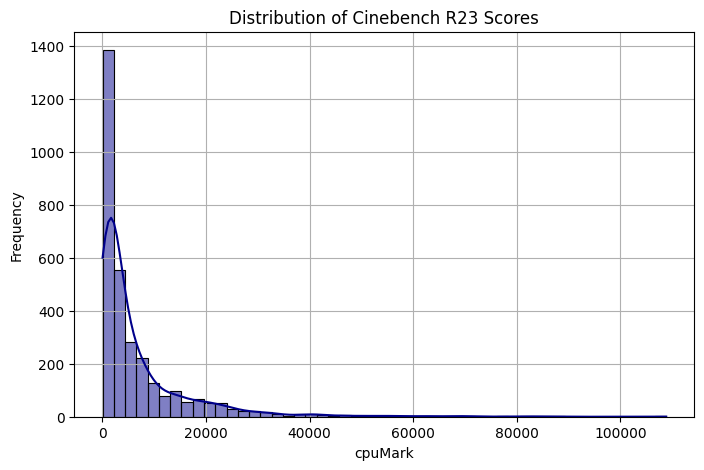

In [120]:
plt.figure(figsize=(8, 5))
sns.histplot(cleanedBenchmarks['cpuMark'], bins = 50, kde = True, color = 'darkblue')
plt.title("Distribution of Cinebench R23 Scores")
plt.xlabel("cpuMark")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Unique categories: ['Desktop' 'Server' 'Desktop, Server' 'Laptop' 'Laptop, Server'
 'Desktop, Mobile/Embedded' 'Server, Mobile/Embedded' 'Mobile/Embedded'
 'Laptop, Mobile/Embedded' 'Desktop, Laptop, Mobile/Embedded'
 'Desktop, Laptop' 'Unknown']


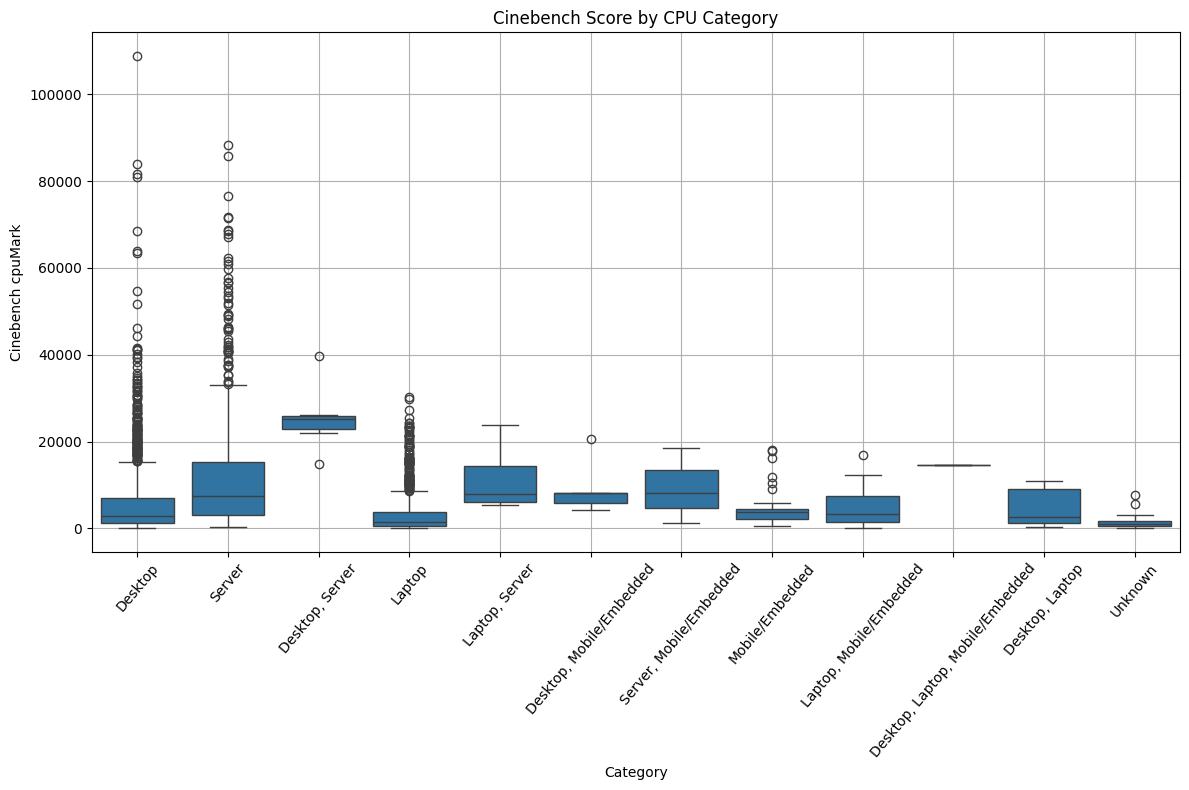

In [121]:
# Strip whitespace and fix case
cleanedBenchmarks['category'] = cleanedBenchmarks['category'].str.strip().str.title()

# Check unique categories
print("Unique categories:", cleanedBenchmarks['category'].unique())

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'category', y = 'cpuMark', data = cleanedBenchmarks)
plt.title("Cinebench Score by CPU Category")
plt.xlabel("Category")
plt.ylabel("Cinebench cpuMark")
plt.xticks(rotation = 50)
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Selection Preprocessing

In [64]:
# Columns to clean
cols_to_clean = ['cpuMark', 'threadMark', 'powerPerf', 'TDP']

for col in cols_to_clean:
    cleanedBenchmarks[col] = cleanedBenchmarks[col].astype(str).str.replace(',', '', regex=True).astype(float)

In [56]:
# Importing Label Encoder and Train Test Split modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [65]:
# Creating a copy for modeling (just a precuation)
modelData = cleanedBenchmarks.copy()

In [66]:
# Encoding 'category' using LabelEncoder
le = LabelEncoder()
modelData['categoryEncoded'] = le.fit_transform(modelData['category'])

In [67]:
# Selecting features and target as X and y
features = ['cores', 'TDP', 'powerPerf', 'threadMark', 'categoryEncoded']
target = 'cpuMark'

X = modelData[features]
y = modelData[target]

In [68]:
# Spliting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Shape of training and test data
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (2512, 5)
Testing data shape:  (628, 5)


## Model Training

In [62]:
# Importing LinearRegression and RandomForest, along with metrics 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
lr_preds = lr_model.predict(X_test)

In [74]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
rf_preds = rf_model.predict(X_test)

## Metrics Evaluation

In [122]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Performance:")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R² Score:", round(r2_score(y_true, y_pred), 4))

# Evaluating both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest Regressor", y_test, rf_preds)


📊 Linear Regression Performance:
MAE: 2163.92
RMSE: 3365.97
R² Score: 0.9026

📊 Random Forest Regressor Performance:
MAE: 537.6
RMSE: 1428.43
R² Score: 0.9825


## User Benchmarking (Model Prediction)

In [123]:
# Model Prediction Comparison Function
def compare_models_prediction(cores, tdp, powerPerf, threadMark, category_str):
    # Encoding category string (same as training)
    categoryEncoded = le.transform([category_str])[0]
    
    # Preparing input as a 2D array (as attributes)
    input_data = [[cores, tdp, powerPerf, threadMark, categoryEncoded]]

    # Prediction using Linear Regression
    lr_pred = lr_model.predict(input_data)[0]
    
    # Prediction using Random Forest
    rf_pred = rf_model.predict(input_data)[0]

    print(f"🧠 Linear Regression Predicted Score:     {round(lr_pred, 2)}")
    print(f"🌲 Random Forest Regressor Predicted Score: {round(rf_pred, 2)}")

    return lr_pred, rf_pred

In [125]:
import platform
import psutil
import cpuinfo

def get_user_system_specs():
    info = cpuinfo.get_cpu_info()
    cores = psutil.cpu_count(logical = False)
    threads = psutil.cpu_count()
    tdp = 65  # Placeholder; TDP is hard to read without an external DB
    powerPerf = round(psutil.cpu_freq().max, 2)  # MHz
    threadMark = threads * 100  # Approximate guess for now
    category = 'Desktop'  # Manual fallback or auto-detect based on chassis type (optional)

    print(f"Detected specs: {info['brand_raw']}, {cores} cores, {threads} threads, {powerPerf} MHz")

    return cores, tdp, powerPerf, threadMark, category

# Run and predict
specs = get_user_system_specs()
compare_models_prediction(*specs)

Detected specs: 12th Gen Intel(R) Core(TM) i5-12450H, 8 cores, 12 threads, 2000.0 MHz
🧠 Linear Regression Predicted Score:     26320.03
🌲 Random Forest Regressor Predicted Score: 6695.18


(np.float64(26320.027605306168), np.float64(6695.18))

## Prediction Accuracy Measure

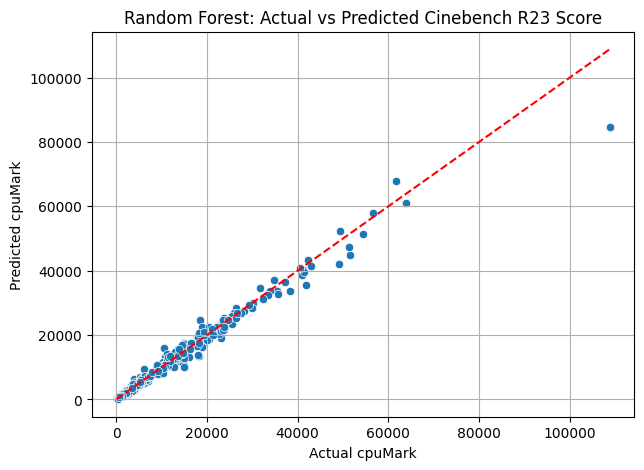

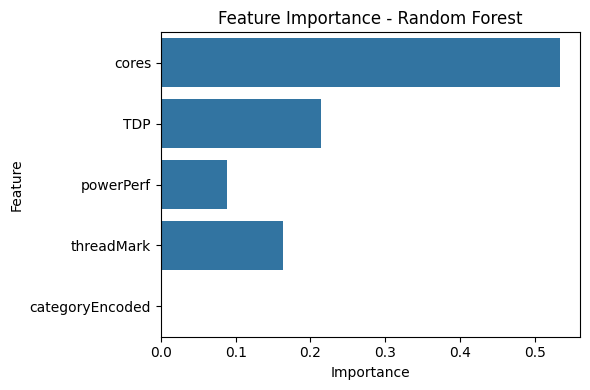

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted - Random Forest
plt.figure(figsize = (7, 5))
sns.scatterplot(x = y_test, y = rf_preds)
plt.xlabel("Actual cpuMark")
plt.ylabel("Predicted cpuMark")
plt.title("Random Forest: Actual vs Predicted Cinebench R23 Score")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line
plt.show()

# 2. Feature Importance
importances = rf_model.feature_importances_
feat_names = X.columns

plt.figure(figsize = (6, 4))
sns.barplot(x = importances, y = feat_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [91]:
# Importing warnings to ignore warnings from Jupyter
import warnings 
warnings.filterwarnings('ignore')

In [129]:
import plotly.express as px

fig = px.scatter_3d(
    cleanedBenchmarks,
    x = 'cores',
    y = 'TDP',
    z = 'cpuMark',
    color = 'category',
    hover_data = ['cpuName'],
    title = "🧩 Interactive 3D: Cores vs TDP vs Cinebench Score"
)

fig.update_layout(
    width = 1000,
    height = 700,
    scene=dict(
        xaxis_title = 'Cores',
        yaxis_title = 'TDP',
        zaxis_title = 'cpuMark'
    )
)

fig.show()

## Real World Comparison

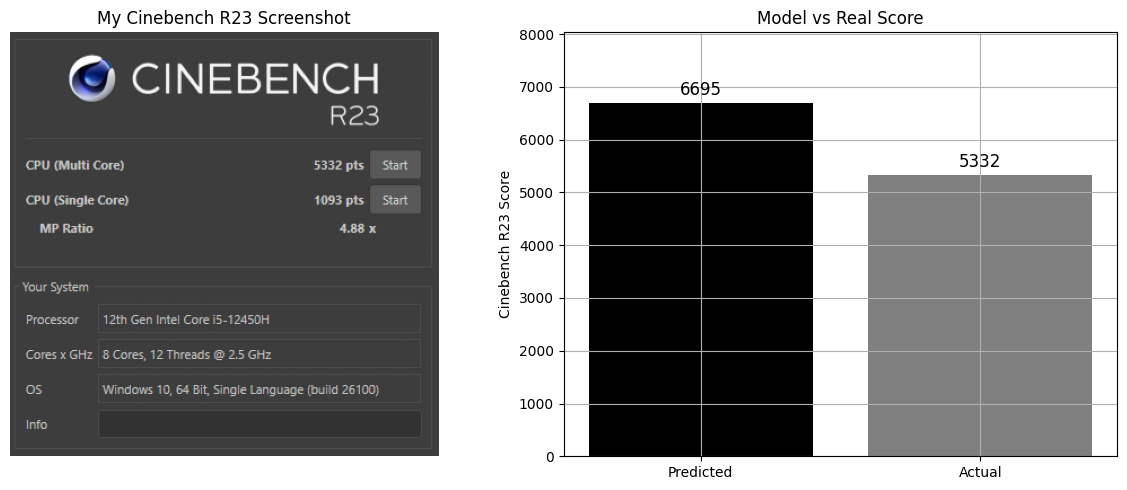

In [130]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Loading the Cinebench screenshot image
img = mpimg.imread("my_score.png")  

actual_score = 5332
predicted_score = 6695

# Plot layout: image + score comparison
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# Screenshot
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title("My Cinebench R23 Screenshot")

# Score comparison bar chart
ax[1].bar(["Predicted", "Actual"], [predicted_score, actual_score], color = ["black", "grey"])
ax[1].set_title("Model vs Real Score")
ax[1].set_ylabel("Cinebench R23 Score")
ax[1].grid(True)
ax[1].set_ylim(0, max(actual_score, predicted_score) * 1.2)

for i, score in enumerate([predicted_score, actual_score]):
    ax[1].text(i, score + 150, f"{score}", ha = 'center', fontsize = 12)

plt.tight_layout()
plt.show()